In [1]:
##### Initial Notebook Setup ####

#Setup so that all output in a cell are printed and not just the last line
    #Source: http://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Essential things for SymPy
from sympy import *
init_printing(use_unicode=True)

# Bennett Natural Coordinates Formulation

Here we generate constraint equations for Bennett mechanism using the Natural Coordinate Formulation.

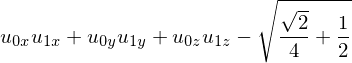

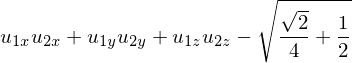

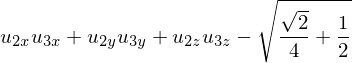

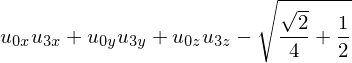

In [79]:
from sympy.vector import CoordSys3D
from sympy.vector import Vector
N = CoordSys3D('N') #For natural constraints, we only this one global coordinate system

n = 4
R = [] #List of position vectors of points
U = [] #List of unit direction vectors
for i in range(n):
    r = symbols('r_'+str(i)+'x:z')
    u = symbols('u_'+str(i)+'x:z')
    R.append(r[0]*N.i + r[1]*N.j + r[2]*N.k)
    U.append(u[0]*N.i + u[1]*N.j + u[2]*N.k)
    
A = (1, 1, 1, 1)
ALPHA = (pi/8, -pi/8, pi/8, -pi/8)


def components(v):
    '''Returns components of a given vector as list'''
    return list(v.components.values())


def equations_link(r1, r2, u1, u2, a, alpha):
    '''This generates constraint equations for a rigid link,
    with 2 basic points and 2 unit direction vectors'''
    r12 = r1 - r2
    return (r12 & u1) - 0, (r12 & u2) - 0, (r12 & r12) - a**2, (u1 & u2) - cos(alpha)


def equations_unit_normal(u):
    '''This generates constraint equations based on the condition that a direction vector is unit'''
    return (u & u) - 1

EQUATIONS = []

#Appending equations applying rigid link and unit-normal constraints
for i in range(n):
    j = i + 1
    if j == n: j = 0 #Cyclic
    eq = list(equations_link(R[i], R[j], U[i], U[j], A[i], ALPHA[i]))
    EQUATIONS += eq
    EQUATIONS.append(equations_unit_normal(U[i]))

#Appending equations applying fixed position constraint on r0 and r1
p1 = A[0]*N.i #Position of r1
EQUATIONS += list((R[0]).components.values())
EQUATIONS += list((R[1] - p1).components.values())

#len(EQUATIONS)
for e in EQUATIONS:
    e

In [62]:
p = 2*N.i + 3*N.j
list((R[0] - p).components.values())

In [77]:
allsyms = []
for i in range(n):
    allsyms += components(R[i])
    allsyms += components(U[i])
    
solve(EQUATIONS, allsyms)

KeyboardInterrupt: 

In [78]:
allsyms